In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:


def generate_data(sigma):
    a_mean = np.array([-1, -1])
    a_cov = sigma * np.array([2, 0.5, 0.5, 1]).reshape((2,2))
    a = np.random.multivariate_normal(mean=a_mean, cov=a_cov, size=100)
    b_mean = np.array([1, -1])
    b_cov = sigma * np.array([1, -0.5, -0.5, 2]).reshape((2,2))
    b = np.random.multivariate_normal(mean=b_mean, cov=b_cov, size=100)
    c_mean = np.array([0, 1])
    c_cov = sigma * np.array([1, 0, 0, 2]).reshape((2,2))
    c = np.random.multivariate_normal(mean=c_mean, cov=c_cov, size=100)
    return a, b, c


In [22]:
def get_assignments(data, c1, c2, c3):
    assignments = []
    for i in range(len(data)):
        p = data[i]
        d = []
        d.append(np.linalg.norm(p - c1))
        d.append(np.linalg.norm(p - c2))
        d.append(np.linalg.norm(p - c3))
        assignments.append(d.index(min(d)))
    return assignments

In [23]:
def update_centers(data, assignments):
    n = np.zeros(6).reshape((3, 2))
    d = np.zeros(3)
    for i in range(len(assignments)):
        n[assignments[i]] += data[i]
        d[assignments[i]] += 1
    c1 = n[0] / d[0]
    c2 = n[1] / d[1]
    c3 = n[2] / d[2]
    return c1, c2, c3

In [24]:
def k_loss(data, assignments, c1, c2, c3):
    c = [c1, c2, c3]
    l = 0
    for i in range(len(assignments)):
        l += np.linalg.norm(data[i] - c[assignments[i]])
    return l / len(assignments)

In [25]:
def k_means(data, c1, c2, c3):
    a = get_assignments(data, c1, c2, c3)
    loss = k_loss(data, a, c1, c2, c3)
    n1, n2, n3 = update_centers(data, a)
    if loss - k_loss(data, a, n1, n2, n3) == 0:
        return c1, c2, c3, loss
    else:
        return k_means(data, n1, n2, n3)

In [26]:
def plot_kmeans(data, assignments, c1, c2, c3):
    plt.scatter(data[:,0], data[:,1], c=assignments, alpha=.5)
    plt.scatter(c1[0], c1[1], s=100, c="red", marker="*")
    plt.scatter(c2[0], c2[1], s=100, c="red", marker="*")
    plt.scatter(c3[0], c3[1], s=100, c="red", marker="*")
    plt.show()

In [27]:
def get_accuracy(clusters, assignments):
    m = np.zeros(9).reshape(3, 3)
    n = len(assignments)
    for it in range(n):
        i = assignments[it]
        j = clusters[it]
        m[i, j] += 1
    a1 = (m[0, 0] + m[1, 1] + m[2, 2]) / n
    a2 = (m[0, 1] + m[1, 2] + m[2, 0]) / n
    a3 = (m[0, 2] + m[1, 0] + m[2, 1]) / n
    return max(a1, a2, a3)

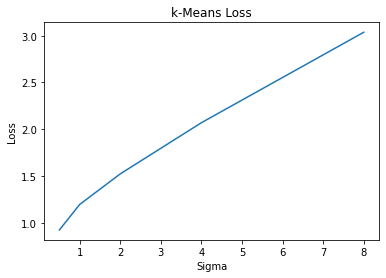

<Figure size 432x288 with 0 Axes>

In [33]:
np.random.seed(5)
sigma = [0.5, 1, 2, 4, 8]
c1 = [0, 2]
c2 = [-1, 0]
c3 = [1, 0]
loss = []
accuracy = []
clusters = np.array([[0] * 100, [1] * 100, [2] * 100]).reshape(300)
for i in range(len(sigma)):
    a, b, c = generate_data(sigma[i])
    data = np.array([a, b, c]).reshape(300, 2)
    x1, x2, x3, l = k_means(data, c1, c2, c3)
    loss.append(l)
    accuracy.append(get_accuracy(clusters, get_assignments(data, x1, x2, x3)))

plt.plot(sigma, loss)
plt.ylabel("Loss")
plt.xlabel("Sigma")
plt.title("k-Means Loss")
plt.savefig("./kmeans_loss.png")
plt.show()
plt.clf()



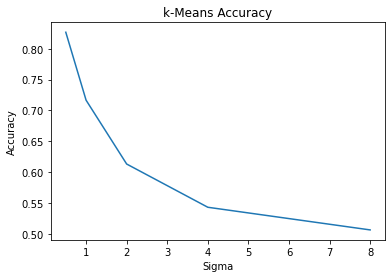

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(sigma, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Sigma")
plt.title("k-Means Accuracy")
plt.savefig("./kmeans_accuracy.png")
plt.show()
plt.clf()